# Actividad
Ejercicio



---
Por: Ángela Daniela Córdoba Álvarez


---




Ejercicio para implementar una Red Neuronal
Convolucional (CNN) aplicada a los conjuntos de datos CIFAR10 y CIFAR100 usando Keras.

In [1]:
# Importar librerías
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

### Dataset CIFAR10

In [2]:
# Cargar conjunto de datos
cifar10 = keras.datasets.cifar10

# Cargar división de entrenamiento y prueba
(training_images, training_labels), (test_images, test_labels) = cifar10.load_data()

# Normalizar los valores de los píxeles de las imágenes
training_images = training_images / 255.0
test_images = test_images / 255.0

# Construcción del modelo
model = keras.models. Sequential ([
    # Agregar convoluciones y max pooling
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D(2, 2),
    # Agrega las mismas capas que antes.
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])

model.summary()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         921,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 923,914 (3.52 MB)

 Trainable params: 923,914 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - accuracy: 0.4286 - loss: 1.5822
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 34ms/step - accuracy: 0.6053 - loss: 1.1283
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.6618 - loss: 0.9664
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.7015 - loss: 0.8540
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.7333 - loss: 0.7533
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.7642 - loss: 0.6739
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.7926 - loss: 0.5923
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.8166 - loss: 0.5186
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.8416 - loss: 0.4582
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.8664 - loss: 0.3903


<Axes: >

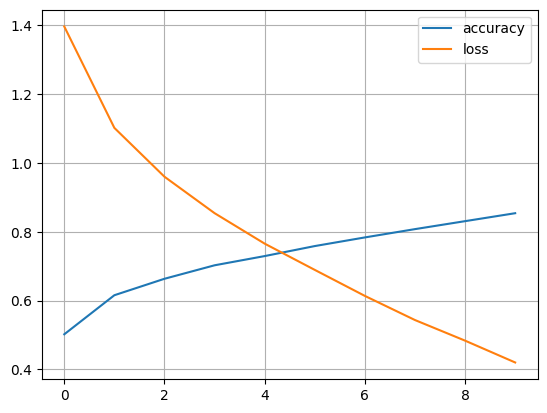

In [3]:
# Compilación del modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(training_images, training_labels, epochs=10)

# Grafucar el historial de entrenamiento
pd.DataFrame(history.history).plot(grid=True)

In [4]:
# Evaluación del modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)
print("Pérdida en el conjunto de entrenamiento:", loss)
print("Precisión en el conjunto de entrenamiento:", accuracy)

# Evaluación del modelo en el conjunto de prueba
loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9001 - loss: 0.3099
Pérdida en el conjunto de entrenamiento: 0.31237128376960754
Precisión en el conjunto de entrenamiento: 0.8984599709510803
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6547 - loss: 1.2074
Pérdida en el conjunto de prueba: 1.218479037284851
Precisión en el conjunto de prueba: 0.6477000117301941


In [5]:
# Predicción
index = 1
print(f'Label: {test_labels[index]}')
classification = model.predict(test_images[index:index+1])
print(f'Classification:\n {classification.reshape(-1,1)}')

Label: [8]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Classification:
 [[2.2142862e-05]
 [7.7486299e-02]
 [5.1889850e-11]
 [6.9442152e-10]
 [4.8901660e-09]
 [3.8453111e-13]
 [9.9090527e-13]
 [1.1347292e-12]
 [9.2247593e-01]
 [1.5569305e-05]]


In [6]:
# Preparación de datos
print(test_labels[:30])

[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]
 [0]
 [9]
 [5]
 [7]
 [9]
 [8]
 [5]
 [7]
 [8]
 [6]
 [7]
 [0]
 [4]
 [9]
 [5]
 [2]
 [4]
 [0]
 [9]
 [6]]


In [7]:
# Selección imágenes de interés
first_image = 8
second_image = 5
third_image = 14
print(test_labels[first_image])
print(test_labels[second_image])
print(test_labels[third_image])

[3]
[6]
[9]


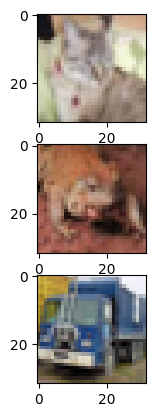

In [8]:
# Visualización de imágenes
f, axarr = plt.subplots(3,1)
axarr[0].imshow(test_images[first_image])
axarr[1].imshow(test_images[second_image])
axarr[2].imshow(test_images[third_image])

In [11]:
model.fit(training_images, training_labels, epochs=1)  # Fit the model for a single epoch

# Extracción de activaciones
layer = 0
filter1 = 0
filter2 = 10
layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)

# Convoluciomes
f, axarr = plt.subplots(3,3)
axarr[0, 0].set_title("Image Input")
axarr[0,0]. imshow(test_images[first_image])

f1 = activation_model.predict(test_images[first_image].reshape(1, 32, 32, 3))[layer]
axarr[0, 1].set_title("Layer"+ str(layer) +", Filter1")
axarr[0,1].imshow(f1[0, : , :, filter1])
axarr[0,2].set_title("Layer"+ str(layer) +", Filter2")
axarr[0,2].imshow(f1[0, : , :, filter2])
axarr[1,0].imshow(test_images[second_image])

f2 = activation_model.predict(test_images[second_image].reshape(1, 32, 32, 3))[layer]
axarr[1,1].imshow(f2[0, : , :, filter1])
axarr[1,2]. imshow(f2[0, : , :, filter2])
axarr[2,0].imshow(test_images[third_image])

f3 = activation_model.predict(test_images[third_image].reshape(1, 32, 32, 3))[layer]
axarr[2,1].imshow(f3[0, : , :, filter1])
axarr[2,2].imshow(f3[0, : , :, filter2])

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.8832 - loss: 0.3422


ValueError: The layer sequential has never been called and thus has no defined input.

### Dataset CIFAR100

In [13]:
# Cargar dataset
cifar100 = keras.datasets.cifar100

# Cargar la divisidn de entrenamiento y prueba
(training_images1, training_labels1), (test_images1, test_labels1) = cifar100.load_data()

# Normalizar los valores de pixeles del tren y probar las imagenes.
training_images1 = training_images1 / 255.0
test_images1 = test_images1 / 255.0

# Construir el modelo
model = keras.models. Sequential ([
    # Agregar convoluciones y max pooling
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D(2, 2),
    # Agrega las mismas capas que antes.
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='softmax')])

model.summary()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         921,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 935,524 (3.57 MB)

 Trainable params: 935,524 (3.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.0684 - loss: 4.1603
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.1884 - loss: 3.3862
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.2382 - loss: 3.1186
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.2716 - loss: 2.9586
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.2900 - loss: 2.8585


<Axes: >

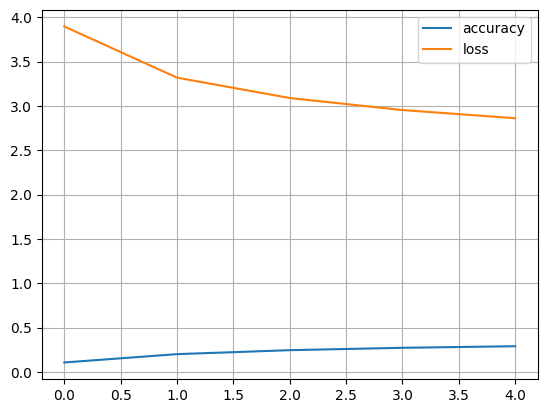

In [15]:
# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history1 = model.fit(training_images1, training_labels1, epochs=5, batch_size=64)

# Graficar el historial de entrenamiento:
pd.DataFrame(history1.history).plot(grid=True)

In [16]:
# Evaluar el modelo en el conjunto de entrenamiento
loss1, accuracy1 = model.evaluate(training_images1, training_labels1)
print("Pérdida en el conjunto de entrenamiento:", loss1)
print("Precisión en el conjunto de entrenamiento:", accuracy1)

# Evaluar el modelo con datos no vistos
loss1, accuracy1 = model.evaluate(test_images1, test_labels1)
print("Pérdida en el conjunto de prueba:", loss1)
print ("Precisión en el conjunto de prueba:", accuracy1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.3133 - loss: 2.7613
Pérdida en el conjunto de entrenamiento: 2.763986349105835
Precisión en el conjunto de entrenamiento: 0.3109799921512604
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2710 - loss: 2.9836
Pérdida en el conjunto de prueba: 2.9888110160827637
Precisión en el conjunto de prueba: 0.26969999074935913


In [17]:
# Predicción

index1 = 1
print(f'Label: {test_labels1[index1]}')
classification1 = model.predict(test_images1[index1:index1+1])
print(f'Classification:\n {classification1.reshape(-1,1)}')

Label: [33]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Classification:
 [[0.00076498]
 [0.01334445]
 [0.00527137]
 [0.01090643]
 [0.01105582]
 [0.00200409]
 [0.0046522 ]
 [0.00326167]
 [0.0240518 ]
 [0.00273565]
 [0.0025808 ]
 [0.0033899 ]
 [0.00520147]
 [0.00395653]
 [0.00649446]
 [0.00526825]
 [0.00290233]
 [0.0024604 ]
 [0.01614947]
 [0.01005365]
 [0.00022719]
 [0.00781853]
 [0.0024467 ]
 [0.00069528]
 [0.00038799]
 [0.00265106]
 [0.00607037]
 [0.03375631]
 [0.00256044]
 [0.02285354]
 [0.0038964 ]
 [0.01223745]
 [0.013421  ]
 [0.05145919]
 [0.00830889]
 [0.00377119]
 [0.00171722]
 [0.01090765]
 [0.059824  ]
 [0.00904746]
 [0.00315623]
 [0.00171824]
 [0.01531546]
 [0.00294521]
 [0.01275499]
 [0.00745839]
 [0.00416642]
 [0.00150391]
 [0.00135052]
 [0.00175189]
 [0.03059843]
 [0.01592195]
 [0.00161404]
 [0.00018556]
 [0.00952151]
 [0.01468833]
 [0.01241926]
 [0.00359472]
 [0.00102966]
 [0.00758793]
 [0.0001139 ]
 [0.00221555]
 [0.0033264 ]
 [0.02285044]
 [0.03384005]
 [0.03703718]
 [0.0332

In [18]:
# Preparación de datos
print(test_labels1[:30])

[[49]
 [33]
 [72]
 [51]
 [71]
 [92]
 [15]
 [14]
 [23]
 [ 0]
 [71]
 [75]
 [81]
 [69]
 [40]
 [43]
 [92]
 [97]
 [70]
 [53]
 [70]
 [49]
 [75]
 [29]
 [21]
 [16]
 [39]
 [ 8]
 [ 8]
 [70]]


In [19]:
# Selección imágenes de interés
first_image1=8
second_image1=5
third_image1=14
print(test_labels1[first_image1])
print(test_labels1[second_image1])
print(test_labels1[third_image1])

[23]
[92]
[40]


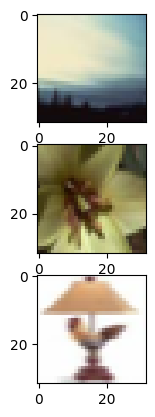

In [21]:
# Visualización de imágenes
f, axarr = plt.subplots(3,1)
axarr[0].imshow(test_images1[first_image1])
axarr[1].imshow(test_images1[second_image1])
axarr[2].imshow(test_images1[third_image1])

In [23]:
# Extracción de activaciones
layer2 = 0
filter11 = 0
filter21 = 10
layer_outputs1 = [layer2.output for layer2 in model.layers]
activation_model1 = keras.models.Model(inputs = model.input, outputs = layer_outputs1)

# Visualización de convoluciones
f, axarr = plt.subplots(3,3)
axarr[0, 0].set_title("Image Input")
axarr[0,0]. imshow(test_images1[first_image1])

f1 = activation_model.predict(test_images1[first_image1].reshape(1, 32, 32, 3))[layer2]
axarr[0, 1].set_title("Layer"+ str(layer2) +", Filter1")
axarr[0,1].imshow(f1[0, : , :, filter11])
axarr[0,2].set_title("Layer"+ str(layer2) +", Filter2")
axarr[0,2].imshow(f1[0, : , :, filter21])
axarr[1,0].imshow(test_images1[second_image1])

f2 = activation_model.predict(test_images1[second_image1].reshape(1, 32, 32, 3))[layer2]
axarr[1,1].imshow(f2[0, : , :, filter11])
axarr[1,2]. imshow(f2[0, : , :, filter21])
axarr[2,0].imshow(test_images1[third_image1])

f3 = activation_model.predict(test_images1[third_image1].reshape(1, 32, 32, 3))[layer2]
axarr[2,1].imshow(f3[0, : , :, filter11])
axarr[2,2].imshow(f3[0, : , :, filter21])

ValueError: The layer sequential_1 has never been called and thus has no defined input.